In [1]:
# imports 
import itertools
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#create data points
def create_dataset():
    x = [(-2 + 0.2*i) for i in range(0,21)]
    y = [(-2 + 0.2*i) for i in range(0,21)]
    data = np.asarray(list(itertools.product(x, y)))

    #create labels
    labels = []
    for i in range (len(data)):
        x_i = data[i][0]
        x_j = data[i][1]
        
        if (math.pow(x_i,2) + math.pow(x_j,2)) <= 1:
            label = 1
        else:
            label = -1
            
        labels.append(label)
            
    
    labels = np.asarray(labels).reshape(len(labels),1)

    return data,labels


#split data 80:20
def split_data(data,labels):
    indices = list(range(data.shape[0]))
    num_training_instances = int(0.8 * labels.shape[0])
    
    random.seed(1)
    np.random.shuffle(indices)

    train_indices = indices[:num_training_instances]
    test_indices = indices[num_training_instances:]

    x_data_train, y_data_train = data[train_indices],labels[train_indices]
    x_data_test, y_data_test = data[test_indices],labels[test_indices]
    
    return x_data_train, y_data_train, x_data_test, y_data_test
    


#create matrix G and compute weights
def train(sigma, centroids, x_data_train, y_data_train):

    G_matrix = np.empty((len(x_data_train),len(centroids)), dtype=float)

    for i in range(G_matrix.shape[0]):
        for j in range(G_matrix.shape[1]):
            distance = np.linalg.norm(x_data_train[i]-centroids[j])
            G_matrix[i][j] = np.exp(-math.pow(distance,2)/(2*math.pow(sigma,2)))

    # compute weights using pseudoinv method   
    W = np.linalg.pinv(G_matrix).dot(y_data_train)
    
    return W

# run testing
def test(W, sigma, x_data_test, centroids, y_data_test):

    # create g matrix
    G_matrix_test = np.empty((len(x_data_test),len(centroids)), dtype=float)

    for i in range(G_matrix_test.shape[0]):
        for j in range(G_matrix_test.shape[1]):
            distance = np.linalg.norm(x_data_test[i]-centroids[j])
            G_matrix_test[i][j] = np.exp(-math.pow(distance,2)/(2*math.pow(sigma,2)))
      
    # return predictions
    pred = np.dot(G_matrix_test,W)
    
    return pred

def MSE(target,pred):
    
    if (len(target)!=len(pred)):
        print("ERROR")
    
    sum_square = 0
    for i in range(len(target)):
        sum_square += math.pow((target[i] - pred[i]),2)
   
    return 1.0 / len(target) * sum_square
    

def accuracy(y_data_test,pred):
   
    pred = (np.sign(pred))
    
    count = 0
    for i in range(len(pred)):
        if pred[i] == y_data_test[i]:
            count +=1
    #print((count/len(pred))*100)
    
    return ((count/len(pred))*100)


In [3]:
# Testing for optimal value of sigma

# create data
data,labels = create_dataset()
# split data
x_data_train, y_data_train, x_data_test, y_data_test = split_data(data,labels)

mse = []
pred = []
acc_test = []
acc_train = []

print ("Running for diff values of sigma...")
for sigma in np.arange (0.01,3,0.01):
    weights = train (sigma,x_data_train,x_data_train,y_data_train)
    
    #pred, mse, acc on training data
    pred = test(weights, sigma, x_data_train,x_data_train,y_data_train)
    mse.append(MSE(y_data_train,pred))
    acc_train.append(accuracy(y_data_train,pred))
    
    #pred, acc on testing data
    pred = test(weights, sigma, x_data_test,x_data_train,y_data_test)
    acc_test.append(accuracy(y_data_test,pred))
    
print ("Done")


Running for diff values of sigma...
Done


0.01


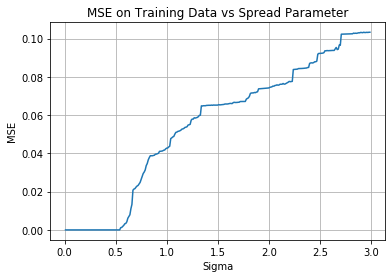

In [4]:
x_axis = list(np.arange(0.01,3,0.01))
plt.xlabel("Sigma")
plt.ylabel("MSE")
plt.title("MSE on Training Data vs Spread Parameter")
plt.plot(x_axis,mse)
plt.grid()

sigma = (x_axis[mse.index(min(mse))])
print (sigma)

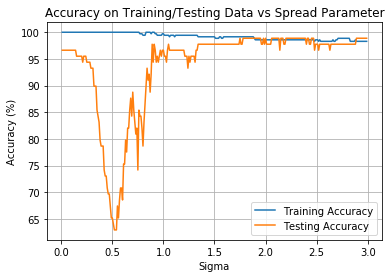

In [5]:
x_axis = list(np.arange(0.01,3,0.01))
plt.xlabel("Sigma")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy on Training/Testing Data vs Spread Parameter")
plt.plot(x_axis,acc_train, label = "Training Accuracy")

plt.plot(x_axis,acc_test, label = "Testing Accuracy")
plt.legend()
plt.grid()

In [ ]:
#Question 3 - Part 1 - Using all data points as centroids

sigma = 0.1

# training accuracy
 
weights = train (sigma,x_data_train,x_data_train,y_data_train)
pred = test(weights, sigma, x_data_train,x_data_train,y_data_train)
print ("Using all points as a centroids, Training accuracy - ", accuracy(y_data_train,pred))

# testing accuracy 
weights = train (sigma,x_data_train,x_data_train,y_data_train)
pred = test(weights, sigma, x_data_test,x_data_train,y_data_test)
print ("Using all points as a centroids, Testing accuracy - ", accuracy(y_data_test,pred))




#Question 3 - Part 2a - Using 150 Randomly chosen centroidd

# chose random centers
indices = np.random.choice(x_data_train.shape[0],150,replace=False)
centroids = x_data_train[indices]


# training accuracy
weights = train (sigma,centroids,x_data_train,y_data_train)
pred = test(weights, sigma, x_data_train,centroids,y_data_train)
print ("Using Random Centroids, Training Accuracy - ", accuracy(y_data_train,pred))

# testing accuracy
W = train(sigma, centroids, x_data_train, y_data_train)
pred = test(W, sigma, x_data_test, centroids, y_data_test)
print ("Using Random Centroids, Testing Accuracy - ", accuracy(y_data_test,pred))




#Question 3 - Part 2b - Using KMeans to find centroid

# get centroids using k_means
kmeans = KMeans(n_clusters=150)
kmeans.fit(x_data_train)
centroids = kmeans.cluster_centers_


# training accuracy
weights = train (sigma,centroids,x_data_train,y_data_train)
pred = test(weights, sigma, x_data_train,centroids,y_data_train)
print ("Using K Means Centroids, Training Accuracy - ", accuracy(y_data_train,pred))

#testing accuracy
W = train(sigma, centroids, x_data_train, y_data_train)
pred = test(W, sigma, x_data_test, centroids, y_data_test)
print ("Using K Means Centroids, Testing Accuracy - ",accuracy(y_data_test,pred))
